# **Python-SQL Project: Navigating the Future of Online Shopping**

## Setup: Import packages & Load datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
customers = pd.read_csv("customers.csv")

from google.colab import files
uploaded = files.upload()
orders = pd.read_csv("orders.csv")

from google.colab import files
uploaded = files.upload()
order_items = pd.read_csv("order_items.csv")

from google.colab import files
uploaded = files.upload()
products = pd.read_csv("products.csv")

from google.colab import files
uploaded = files.upload()
payments = pd.read_csv("payments.csv")

from google.colab import files
uploaded = files.upload()
sellers = pd.read_csv("sellers.csv", encoding="latin1")

In [ ]:
from google.colab import files
uploaded = files.upload()
geolocation = pd.read_csv("geolocation.csv")

# quick checks
print(customers.head())
print(orders.head())

Saving geolocation.csv to geolocation.csv
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9

## Basic Problems

**Q1. List all unique cities where customers are located**

In [ ]:
unique_cities = customers["customer_city"].unique()
print(len(unique_cities), "unique cities")
unique_cities[:10]   # show first 10

4119 unique cities


array(['franca', 'sao bernardo do campo', 'sao paulo', 'mogi das cruzes',
       'campinas', 'jaragua do sul', 'timoteo', 'curitiba',
       'belo horizonte', 'montes claros'], dtype=object)

**Q2. Count the number of orders placed in 2017**

In [ ]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders_2017 = orders[orders["order_purchase_timestamp"].dt.year == 2017]
print("Total Orders in 2017:", len(orders_2017))

Total Orders in 2017: 45101


**Q3. Total sales per category**

In [ ]:
df = order_items.merge(products, on="product_id", how="left")
sales_per_category = df.groupby("product category")["price"].sum().reset_index()
sales_per_category = sales_per_category.sort_values("price", ascending=False)
sales_per_category.head()

,product category,price
30,HEALTH BEAUTY,1258681.34
45,Watches present,1205005.68
49,bed table bath,1036988.68
68,sport leisure,988048.97
53,computer accessories,911954.32


**Q4. Percentage of orders paid in installments**

In [ ]:
order_installments = payments.groupby("order_id")["payment_installments"].max().reset_index()
percent_installments = 100 * (order_installments["payment_installments"] > 1).mean()
print("Percent of orders with installments:", round(percent_installments,2), "%")

Percent of orders with installments: 51.46 %


**Q5. Count customers from each state**

In [ ]:
cust_state = customers.groupby("customer_state").size().reset_index(name="customer_count")
cust_state = cust_state.sort_values("customer_count", ascending=False)
cust_state.head()

,customer_state,customer_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


## Intermediate Problems

**Q1. Calculate the number of orders per month in 2018**

In [ ]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders_2018 = orders[orders["order_purchase_timestamp"].dt.year == 2018]

monthly_orders = orders_2018.groupby(orders_2018["order_purchase_timestamp"].dt.to_period("M")).size().reset_index(name="total_orders")
monthly_orders["order_purchase_timestamp"] = monthly_orders["order_purchase_timestamp"].astype(str)
monthly_orders.head()

,order_purchase_timestamp,total_orders
0,2018-01,7269
1,2018-02,6728
2,2018-03,7211
3,2018-04,6939
4,2018-05,6873


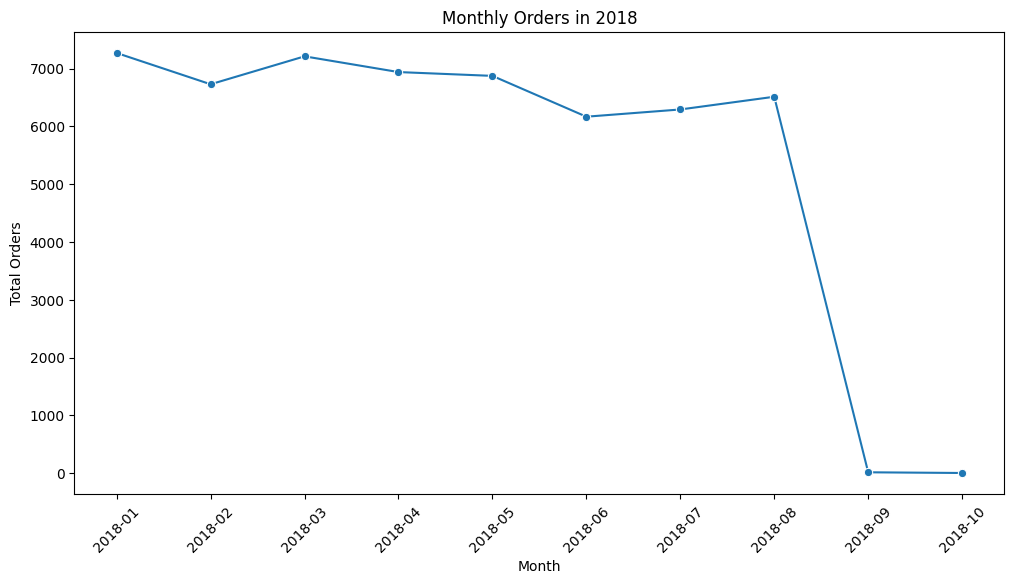

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x="order_purchase_timestamp", y="total_orders", marker="o")
plt.title("Monthly Orders in 2018")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()

**Q2. Find the average number of products per order, grouped by customer city**

In [ ]:
order_item_count = order_items.groupby("order_id").size().reset_index(name="item_count")
orders_with_customers = orders.merge(customers, on="customer_id", how="left").merge(order_item_count, on="order_id", how="left")

avg_products_city = orders_with_customers.groupby("customer_city")["item_count"].mean().reset_index()
avg_products_city = avg_products_city.sort_values("item_count", ascending=False)
avg_products_city.head()

,customer_city,item_count
2625,padre carvalho,7.0
909,celso ramos,6.5
1156,datas,6.0
758,candido godoi,6.0
2269,matias olimpio,5.0


/tmp/ipython-input-182956369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_products_city.head(10), x="item_count", y="customer_city", palette="plasma")


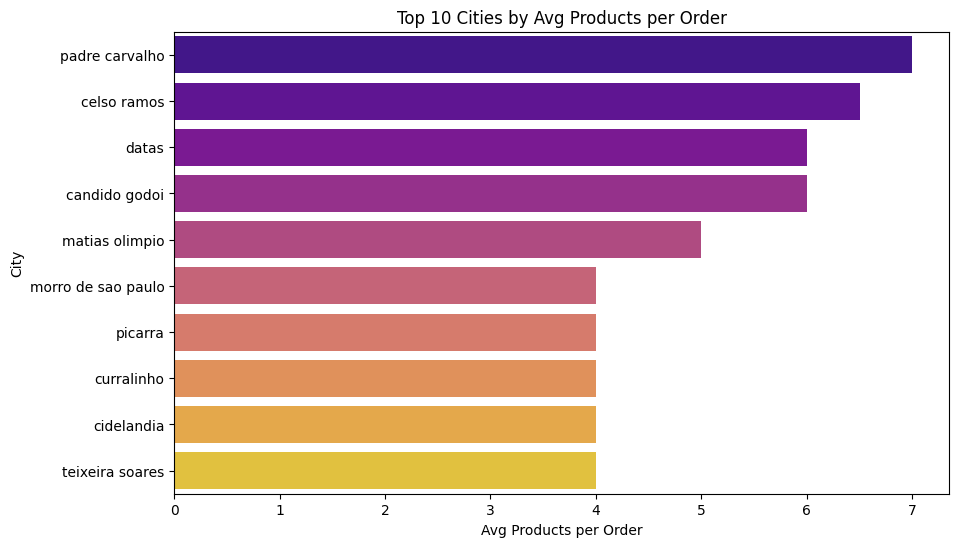

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_products_city.head(10), x="item_count", y="customer_city", palette="plasma")
plt.title("Top 10 Cities by Avg Products per Order")
plt.xlabel("Avg Products per Order")
plt.ylabel("City")
plt.show()

**Q3. Calculate the percentage of total revenue contributed by each product category**

In [ ]:
df = order_items.merge(products, on="product_id", how="left")
revenue_per_cat = df.groupby("product category")["price"].sum().reset_index()
total_revenue = revenue_per_cat["price"].sum()
revenue_per_cat["percent_revenue"] = 100 * revenue_per_cat["price"] / total_revenue
revenue_per_cat = revenue_per_cat.sort_values("percent_revenue", ascending=False)
revenue_per_cat.head()

,product category,price,percent_revenue
30,HEALTH BEAUTY,1258681.34,9.384664
45,Watches present,1205005.68,8.984461
49,bed table bath,1036988.68,7.731735
68,sport leisure,988048.97,7.366843
53,computer accessories,911954.32,6.799485


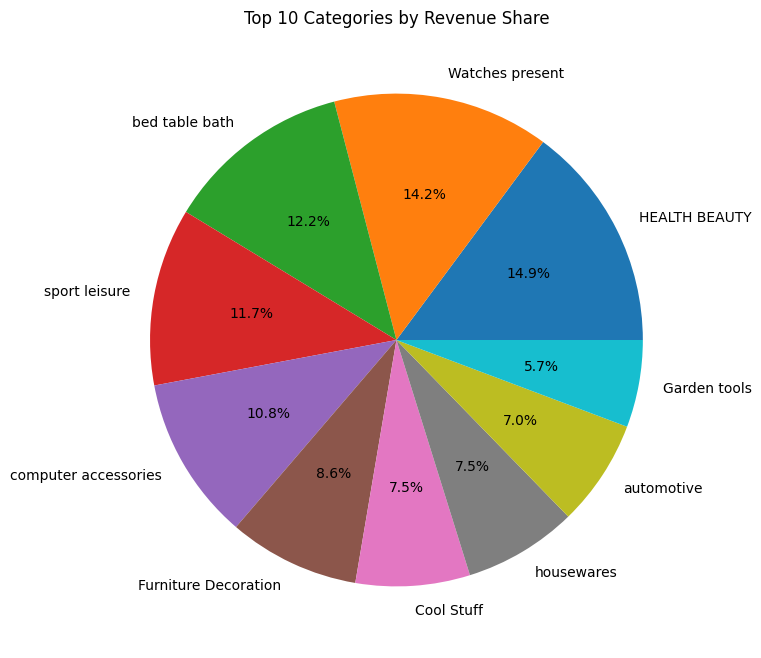

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(revenue_per_cat.head(10)["percent_revenue"], labels=revenue_per_cat.head(10)["product category"], autopct='%1.1f%%')
plt.title("Top 10 Categories by Revenue Share")
plt.show()

**Q4. Correlation between product price and number of times purchased**

In [ ]:
product_stats = order_items.groupby("product_id").agg(
    avg_price=("price","mean"),
    times_purchased=("order_id","count")
).reset_index()

correlation = product_stats[["avg_price","times_purchased"]].corr()
print(correlation)

                 avg_price  times_purchased
avg_price          1.00000         -0.03214
times_purchased   -0.03214          1.00000


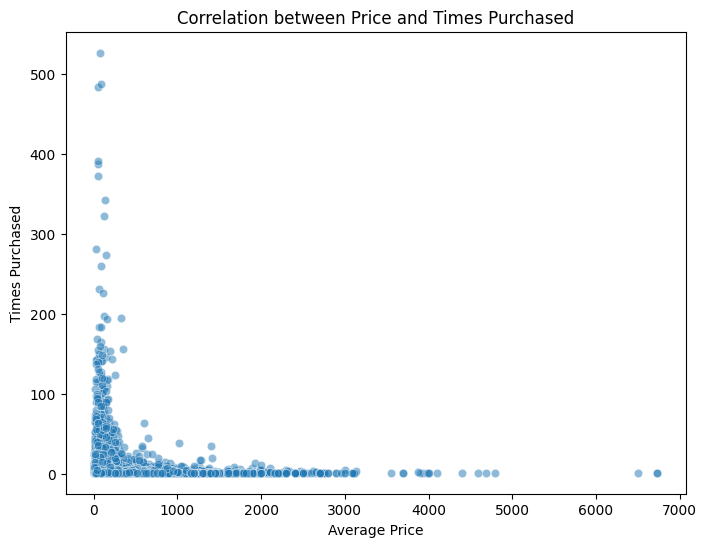

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=product_stats, x="avg_price", y="times_purchased", alpha=0.5)
plt.title("Correlation between Price and Times Purchased")
plt.xlabel("Average Price")
plt.ylabel("Times Purchased")
plt.show()

**Q5. Total revenue generated by each seller, ranked**

In [ ]:
seller_revenue = order_items.merge(sellers, on="seller_id", how="left")
seller_revenue = seller_revenue.groupby(["seller_id","seller_city","seller_state"])["price"].sum().reset_index()
seller_revenue = seller_revenue.sort_values("price", ascending=False)
seller_revenue.head()

,seller_id,seller_city,seller_state,price
857,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63
1013,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05
881,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,187923.89


/tmp/ipython-input-2617757605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_revenue.head(10), x="price", y="seller_id", palette="coolwarm")


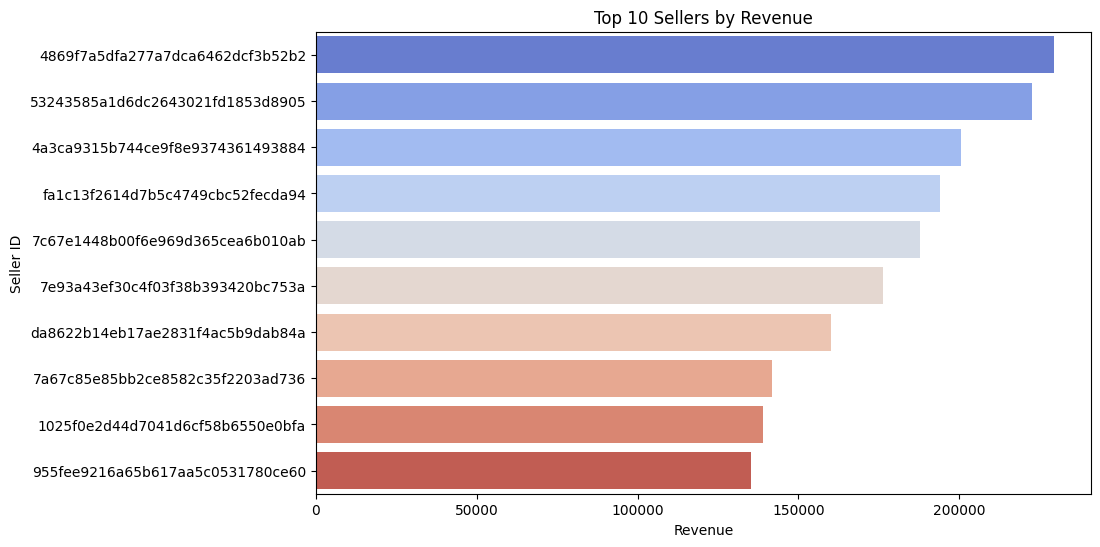

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=seller_revenue.head(10), x="price", y="seller_id", palette="coolwarm")
plt.title("Top 10 Sellers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Seller ID")
plt.show()

## Advanced Problems



**Q1. Moving average of order values for each customer**

In [ ]:
# Merge orders with order_items to get order values
order_values = order_items.groupby("order_id")["price"].sum().reset_index()
order_values = orders.merge(order_values, on="order_id", how="left")

# Sort per customer by purchase date
order_values = order_values.sort_values(["customer_id", "order_purchase_timestamp"])

# Calculate rolling average
order_values["moving_avg_order_value"] = order_values.groupby("customer_id")["price"].transform(lambda x: x.rolling(3, min_periods=1).mean())
order_values.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,moving_avg_order_value
68578,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 0:00:00,89.80,89.80
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 9:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 0:00:00,54.90,54.90
65884,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 8:57:49,2017-03-22 0:00:00,179.99,179.99
43174,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 3:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 0:00:00,149.90,149.90
5888,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 3:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 0:00:00,93.00,93.00
73652,cd3558a10d854487b4f907e9b326a4fc,0004164d20a9e969af783496f3408652,delivered,2017-04-12 08:35:12,2017-04-12 8:50:12,2017-04-12 17:05:42,2017-04-20 16:12:26,2017-05-04 0:00:00,59.99,59.99
46156,07f6c3baf9ac86865b60f640c4f923c6,000419c5494106c306a97b5635748086,delivered,2018-03-02 17:47:40,2018-03-03 14:10:38,2018-03-07 21:07:51,2018-04-17 17:17:34,2018-03-22 0:00:00,34.30,34.30
59978,8c3d752c5c02227878fae49aeaddbfd7,00046a560d407e99b969756e0b10f282,delivered,2017-12-18 11:08:30,2017-12-18 12:45:31,2017-12-18 20:55:54,2017-12-26 20:58:33,2018-01-12 0:00:00,120.90,120.90
79246,fa906f338cee30a984d0945b3832e431,00050bf6e01e69d5c0fd612f1bcfb69c,delivered,2017-09-17 16:04:44,2017-09-17 16:15:13,2017-09-18 21:02:46,2017-10-02 21:14:31,2017-10-13 0:00:00,69.99,69.99
80371,9b961b894e797f63622137ff7eb1c1af,000598caf2ef4117407665ac33275130,delivered,2018-08-11 12:14:35,2018-08-11 12:25:08,2018-08-13 14:41:00,2018-08-20 18:18:41,2018-09-06 0:00:00,1107.00,1107.00


**Q2. Cumulative sales per month for each year**

In [ ]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

# Merge sales values
monthly_sales = orders.merge(order_items, on="order_id", how="left")
monthly_sales["year_month"] = monthly_sales["order_purchase_timestamp"].dt.to_period("M")

sales_per_month = monthly_sales.groupby("year_month")["price"].sum().reset_index()
sales_per_month["cumulative_sales"] = sales_per_month.groupby(sales_per_month["year_month"].dt.year)["price"].cumsum()
sales_per_month.head()

,year_month,price,cumulative_sales
0,2016-09,267.36,267.36
1,2016-10,49507.66,49775.02
2,2016-12,10.90,49785.92
3,2017-01,120312.87,120312.87
4,2017-02,247303.02,367615.89


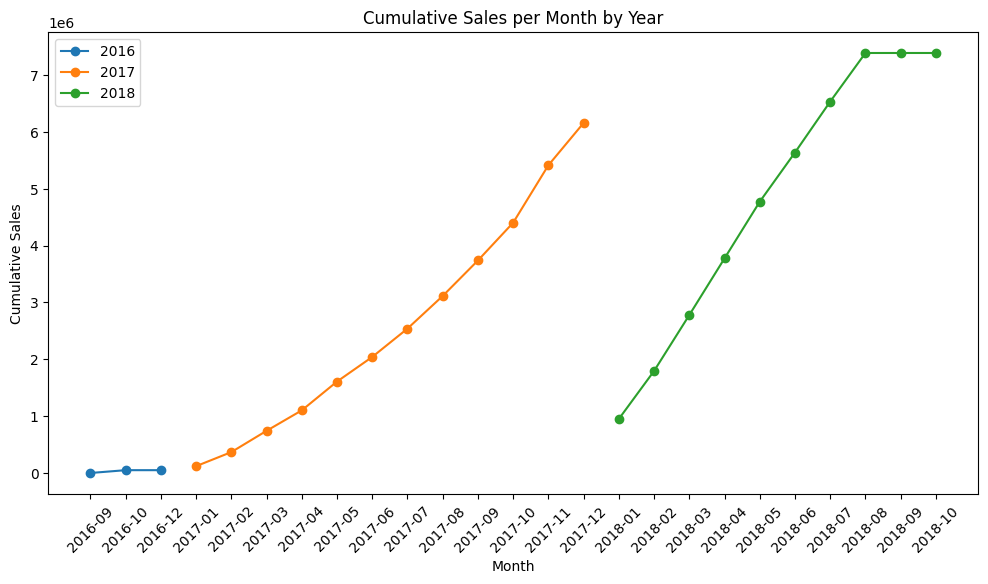

In [ ]:
plt.figure(figsize=(12,6))
for year, data in sales_per_month.groupby(sales_per_month["year_month"].dt.year):
    plt.plot(data["year_month"].astype(str), data["cumulative_sales"], marker="o", label=str(year))

plt.title("Cumulative Sales per Month by Year")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Q3. Year-over-Year Growth Rate**

In [ ]:
orders["year"] = orders["order_purchase_timestamp"].dt.year

# Merge sales values
sales_per_year = orders.merge(order_items, on="order_id", how="left").groupby("year")["price"].sum().reset_index()

# Calculate growth rate
sales_per_year["growth_rate_%"] = sales_per_year["price"].pct_change() * 100
sales_per_year

,year,price,growth_rate_%
0,2016,49785.92,NaN
1,2017,6155806.98,12264.554035
2,2018,7386050.80,19.985094


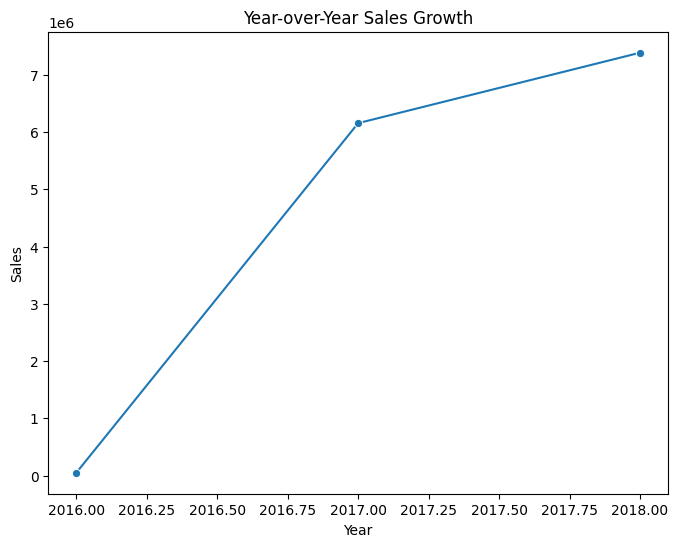

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=sales_per_year, x="year", y="price", marker="o")
plt.title("Year-over-Year Sales Growth")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

**Q4. Customer retention (6-month repeat purchase rate)**

In [ ]:
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

# First purchase
first_purchase = orders.groupby("customer_id")["order_month"].min().reset_index()
orders = orders.merge(first_purchase, on="customer_id", suffixes=("","_first"))

# Calculate if repeat within 6 months
orders["months_since_first"] = (orders["order_month"] - orders["order_month_first"]).apply(lambda x: x.n)
repeat_customers = orders[orders["months_since_first"].between(1,6)]["customer_id"].nunique()
total_customers = orders["customer_id"].nunique()

retention_rate = repeat_customers / total_customers * 100
print(f"6-Month Repeat Purchase Retention Rate: {retention_rate:.2f}%")

6-Month Repeat Purchase Retention Rate: 0.00%


**Q5. Top 3 customers by spend each year**

In [ ]:
# Merge orders and order_items
cust_spend = orders.merge(order_items, on="order_id", how="left")
cust_spend["year"] = cust_spend["order_purchase_timestamp"].dt.year

top_customers = (cust_spend.groupby(["year","customer_id"])["price"].sum()
                 .reset_index()
                 .sort_values(["year","price"], ascending=[True,False]))

# Get top 3 per year
top_3_customers = top_customers.groupby("year").head(3)
top_3_customers

,year,customer_id,price
223,2016,a9dc96b027d1252bbac0a9b72d837fc6,1399.00
38,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1299.99
84,2016,4a06381959b6670756de02e07b83815f,1199.00
4218,2017,1617b1357756262bfa56ab541c47bc16,13440.00
35453,2017,c6e2731c5b391845f6800c97401a43a9,6735.00
11541,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
95349,2018,ec5b2ba62e574342386871631fafd3fc,7160.00
97087,2018,f48d464a0baaea338cb25f816991ab1f,6729.00
92873,2018,e0a2412720e9ea4f26c1ac985f6a7358,4599.90


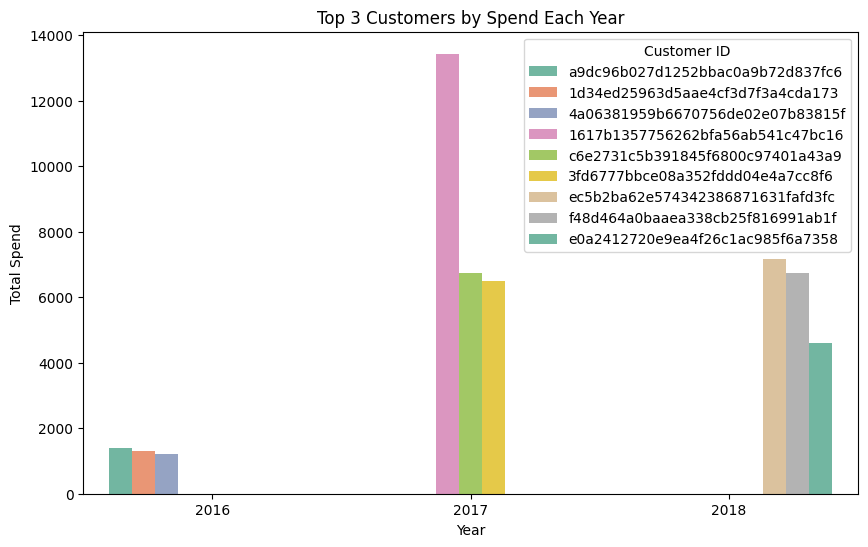

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_3_customers, x="year", y="price", hue="customer_id", palette="Set2")
plt.title("Top 3 Customers by Spend Each Year")
plt.xlabel("Year")
plt.ylabel("Total Spend")
plt.legend(title="Customer ID")
plt.show()